## Descarga de archivos y librerias

In [ ]:
#Descargo los valores de operation

!gdown 1dJYqX6LryQcYUYPm6BDOb7Nrw2fK8vPg

#Descargo los valores de diagnostics

!gdown 1DawTQLJzLGkSWsvfuE2w-p6LMmmpqSjd


Downloading...
From: https://drive.google.com/uc?id=1dJYqX6LryQcYUYPm6BDOb7Nrw2fK8vPg
To: /content/operations.csv
100% 16.3M/16.3M [00:00<00:00, 114MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DawTQLJzLGkSWsvfuE2w-p6LMmmpqSjd
To: /content/diagnosis.csv
100% 53.6M/53.6M [00:00<00:00, 122MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
di_data = pd.read_csv("diagnosis.csv")
di_data
ope_data = pd.read_csv("operations.csv")
#vi_data = pd.read_csv("vitals.csv")
#di_data

## Adición de columna UCI_TIME

In [ ]:
#Analizamos nuestro TARGET.

#'icuout_time' ,'icuin_time' ,'inhosp_death_time'

# Filtrar las columnas relevantes en un nuevo DataFrame
new_df = ope_data[['icuin_time', 'icuout_time', 'inhosp_death_time']]
difference=(new_df['icuout_time'] - new_df['icuin_time'])

# Convertir NaN a cero en las columnas de tiempo de UCI y calcular UCI_TIME
UCI_time=difference.fillna(0)
UCI_time=difference.fillna(0)
new_df['UCI_TIME'] = UCI_time
# Crear un dataframe con columna UCI_TIME y las columnas restadas


# Crear la columna Mortality basada en inhosp_death_time
new_df['Mortality'] = np.where(new_df['inhosp_death_time'].notna(),1,0)

new_df['inhosp_death_time'] = new_df['inhosp_death_time'].fillna(0)

# Resultado
print(new_df)

        icuin_time  icuout_time  inhosp_death_time  UCI_TIME  Mortality
0              NaN          NaN                0.0       0.0          0
1           1550.0      19595.0            69860.0   18045.0          1
2              NaN          NaN                0.0       0.0          0
3              NaN          NaN                0.0       0.0          0
4              NaN          NaN                0.0       0.0          0
...            ...          ...                ...       ...        ...
131104         NaN          NaN                0.0       0.0          0
131105         NaN          NaN                0.0       0.0          0
131106         NaN          NaN                0.0       0.0          0
131107     13955.0      15120.0                0.0    1165.0          0
131108         NaN          NaN                0.0       0.0          0

[131109 rows x 5 columns]


<ipython-input-34-cc47b79ed089>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['UCI_TIME'] = UCI_time
<ipython-input-34-cc47b79ed089>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Mortality'] = np.where(new_df['inhosp_death_time'].notna(),1,0)
<ipython-input-34-cc47b79ed089>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

##Pacientes UCI

In [ ]:
# Seleccion de los pacientes que si entraron a UCI
def filtrar_por_valor(df, columna, valor):
    return df[df[columna] > valor].index

# Nombre de la columna que quieres filtrar
columna_a_analizar = 'UCI_TIME'

# Valor para el filtro
valor_limite = 0

# Obtener los índices de las filas que cumplen con el criterio
indices_filtrados = filtrar_por_valor(new_df, columna_a_analizar, valor_limite)

# Crear un nuevo DataFrame usando los índices filtrados
paciente_UCI = ope_data.loc[indices_filtrados]
paciente_UCI

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
1,446270725,158995752,257857903,NaN,0,70,M,43.0,168.0,Asian,...,1540.0,0,70555,1345.0,1540.0,NaN,NaN,1550.0,19595.0,69860.0
14,487807079,145247513,259299532,NaN,74880,25,M,46.0,172.0,Asian,...,76120.0,0,109435,76070.0,76125.0,NaN,NaN,63275.0,78560.0,NaN
22,480242953,187733661,238035661,NaN,10080,55,F,46.0,151.0,Asian,...,11070.0,0,34555,10560.0,11070.0,10665.0,10965.0,11080.0,19515.0,NaN
23,462956682,162604840,267911567,NaN,5760,60,M,57.0,151.0,Asian,...,7090.0,0,23035,6785.0,7090.0,NaN,NaN,7095.0,8125.0,NaN
24,485183540,160631734,285012362,NaN,1440,70,M,68.0,172.0,Asian,...,2440.0,0,11515,1935.0,2455.0,2080.0,2335.0,2455.0,4060.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131064,494319208,150497300,289152391,NaN,3483360,80,F,51.0,148.0,Asian,...,3485035.0,3483360,3572635,3484775.0,3485040.0,NaN,NaN,3485060.0,3513045.0,NaN
131067,474723417,152774881,253900635,NaN,14400,80,F,66.0,146.0,Asian,...,15665.0,0,27355,15485.0,15670.0,15555.0,15600.0,13770.0,19490.0,NaN
131071,468666428,137181591,298918264,NaN,5760,65,F,60.0,158.0,Asian,...,6965.0,0,17275,6615.0,6970.0,NaN,NaN,6970.0,8015.0,NaN
131086,465468763,150497300,289152391,NaN,3483360,80,F,51.0,148.0,Asian,...,3484750.0,3483360,3572635,3484705.0,3484760.0,NaN,NaN,3485060.0,3513045.0,NaN


In [ ]:
#De los paceintes que entraron a UCI, veo la frecuencia por cada tipo de intervención
columna_para_analizar = 'icd10_pcs'

# Obtener las frecuencias de cada valor en la columna
frecuencias = paciente_UCI[columna_para_analizar].value_counts()

# Crear un nuevo DataFrame con los valores y sus frecuencias
frecuencias = pd.DataFrame({'Valor': frecuencias.index, 'Frecuencia': frecuencias.values})
frecuencias

,Valor,Frecuencia
0,00B00,1590
1,02RF0,604
2,02110,528
3,0FY00,520
4,0WJG0,374
...,...,...
742,0TG00,1
743,0TSB0,1
744,047Y0,1
745,0VB94,1


In [ ]:
paciente_pro=paciente_UCI[paciente_UCI['icd10_pcs'] =='00B00']
pacientes_UCI_id=paciente_pro['subject_id']
#paciente_00B00
pacientes_UCI_id

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Estos son los pacientes con el codigo de icd10_pcs=00B00
indices = pacientes_UCI_id  # Lista de índices que quieres extraer
frames = []  # Lista para guardar las filas extraídas

for indice in indices:
    fila = di_data[di_data['subject_id'] == indice]
    frames.append(fila)  # Agrega la fila extraída a la lista

# Usando concat para combinar todas las filas en un nuevo DataFrame
diag_indices_D32 = pd.concat(frames)
diag_indices_D32

,subject_id,chart_time,icd10_cm
3824,158995752,0,K55
25096,158995752,2880,K56
25097,158995752,53280,C16
25098,158995752,53280,J15
25099,158995752,69120,A41
...,...,...,...
750473,134061920,264960,C16
752896,134061920,266400,C16
752915,134061920,276480,C16
752924,134061920,286560,C16


In [ ]:

#diagnosticos dependiendo del tipo de icd10_pcs seleccionado
ids_with_unique = diag_indices_D32['subject_id'].unique()

filtered_df_UCI = di_data[di_data['subject_id'].isin(ids_with_unique)]
# Agrupar por 'subject_id' y agregar
aggregated_data = filtered_df_UCI.groupby('subject_id').agg(
    num_times=('subject_id', 'size'),              # Contar las ocurrencias de cada subject_id
    diagnoses=('icd10_cm', lambda x: list(set(x)))      # Lista de diagnósticos encontrados
).reset_index()

# Visualizar la tabla
aggregated_data

,subject_id,num_times,diagnoses
0,100228291,63,"[K62, K25, N31, N49, C20]"
1,100407302,91,"[N21, I25, N48, I50, H26, K55, I20, S72, I63, ..."
2,100751234,20,"[Z00, R57, C56, E04, R94, T81, M81]"
3,100882784,14,"[C16, R18, C18, J90]"
4,102631413,147,"[T88, C22, J06, Z94, I83]"
...,...,...,...
348,197432631,85,"[C22, K29, Z11, K80, K63, Z94, H81, R41]"
349,197975380,15,"[C78, R18, C56, K21]"
350,198133440,12,"[D17, I31, C48]"
351,198249221,26,"[K56, T81]"


## Pacientes diagnosticados con almenos K35

In [ ]:
# Pacientes UCI con diagnostico K35
# Filtrar por los subject_id que tienen al menos un diagnóstico D32
ids_with_ID = di_data[di_data['icd10_cm'] == 'K35']['subject_id'].unique()
#ids_with_UCI = pacientes_UCI_id.unique()

df_VAL2 = pd.DataFrame(ids_with_ID)

In [ ]:
from google.colab import files
# Guardar DataFrame como CSV en Colab
df_VAL2.to_csv('datos3.csv', index=False)

# Descargar el archivo CSV
files.download('datos3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filtrar el DataFrame original para incluir solo esos subject_id
filtered_df_data = di_data[di_data['subject_id'].isin(ids_with_ID)]

# Agrupar por 'subject_id' y agregar
aggregated_data = filtered_df_data.groupby('subject_id').agg(
    num_times=('subject_id', 'size'),              # Contar las ocurrencias de cada subject_id
    diagnoses=('icd10_cm', lambda x: list(set(x)))      # Lista de diagnósticos encontrados
).reset_index()

# Visualizar la tabla
aggregated_data

,subject_id,num_times,diagnoses
0,100549002,95,"[I25, L30, C43, R35, I20, K40, R91, I48, R07, ..."
1,100721821,3,"[K35, R10, H26]"
2,100898902,187,"[R94, D13, R52, R22, E14, C17, M48, R73, L85, ..."
3,101015261,8,"[K58, K51, K35]"
4,101355512,61,"[Z00, I26, R10, C78, Z71, R92, M54, T08, K35, ..."
...,...,...,...
368,199448542,92,"[I89, C50, Z01, N64, N93, M54, C79, K35]"
369,199717104,315,"[L03, I46, T85, C16, T81, R52, K25, E14, J96, ..."
370,199735073,9,"[M48, K35, G58, M43]"
371,199826863,12,"[K63, N95, K26, K59, K92, K35, R10]"


## Pacientes diagnosticado de solo K35

In [ ]:
# Crear un DataFrame solo con esos subject_id
filtered_df = di_data[di_data['subject_id'].isin(ids_with_ID)]

# Agrupar por 'subject_id' y usar un filtro para asegurar que solo contengan D32
only_D32_df = filtered_df.groupby('subject_id').filter(lambda x: all(x['icd10_cm'] == 'K35'))


# Contar las veces que se repite cada subject_id solo con diagnósticos D32
aggregated_data = only_D32_df.groupby('subject_id').agg(
    num_times=('subject_id', 'size'),  # Contar las ocurrencias de cada subject_id
    diagnoses=('icd10_cm', lambda x: list(set(x)))  # Lista única de diagnósticos encontrados
).reset_index()

# Mostrar la tabla resultante
aggregated_data

,subject_id,num_times,diagnoses
0,103122272,5,[K35]
1,105735554,1,[K35]
2,106490924,3,[K35]
3,106967793,4,[K35]
4,107089101,4,[K35]
5,109062280,4,[K35]
6,110484253,7,[K35]
7,111345854,2,[K35]
8,116001431,1,[K35]
9,118010014,3,[K35]


In [ ]:
diagnostic_D32= only_D32_df[only_D32_df['icd10_cm'] == 'K35']['subject_id'].tolist()

diagnostic_D32
diag_D32 = []
for item in diagnostic_D32:
    if item not in diag_D32:
        diag_D32.append(item)


#diag_D32 #Tengo la lista de los sujetos que solo tienen diagnostico de D32
#diagnostic_D32

In [ ]:
from google.colab import files

df_VAL = pd.DataFrame(diag_D32)

# Guardar DataFrame como CSV en Colab
df_VAL.to_csv('datos.csv', index=False)

# Descargar el archivo CSV
files.download('datos.csv')

In [ ]:
# Asumiendo que ope_data es tu DataFrame original
indices = diag_D32  # Lista de índices que quieres extraer
frames = []  # Lista para guardar las filas extraídas

for indice in indices:
    fila = ope_data[ope_data['subject_id'] == indice]
    frames.append(fila)  # Agrega la fila extraída a la lista

# Usando concat para combinar todas las filas en un nuevo DataFrame
operation_D32 = pd.concat(frames)
#operation_D32

##Analisis de la supervivencia
Se realiza un analisis a todo el data frame de operations y diagnostics
para ver que codigo idc10_pcs tiene mayor mortandad

In [ ]:
val= pd.concat([new_df,ope_data['icd10_pcs']],axis=1)

# Obtener los valores únicos de 'icd10_pcs'
unique_icd10_pcs = val['icd10_pcs'].unique()

# Crear una lista para almacenar los recuentos de Mortality
mortality_counts = []

# Iterar sobre los valores únicos de 'icd10_pcs'
for icd10_pcs in unique_icd10_pcs:
    # Filtrar el DataFrame por el valor de 'icd10_pcs'
    filtered_df = val[val['icd10_pcs'] == icd10_pcs]
    # Contar los valores de 'Mortality' igual a 1 en el DataFrame filtrado
    mortality_count = filtered_df['Mortality'].sum()
    # Agregar el valor único de 'icd10_pcs' y su recuento de mortalidad a la lista
    mortality_counts.append((icd10_pcs, mortality_count))

# Crear un DataFrame a partir de la lista de tuplas
mortality_df = pd.DataFrame(mortality_counts, columns=['icd10_pcs', 'Mortality_Count'])

mortality_df

,icd10_pcs,Mortality_Count
0,09B70,15
1,0WJG0,97
2,0DHS0,0
3,10D00,2
4,0JQC0,1
...,...,...
2250,0NX00,0
2251,0M910,0
2252,0SYD0,0
2253,0SB00,0


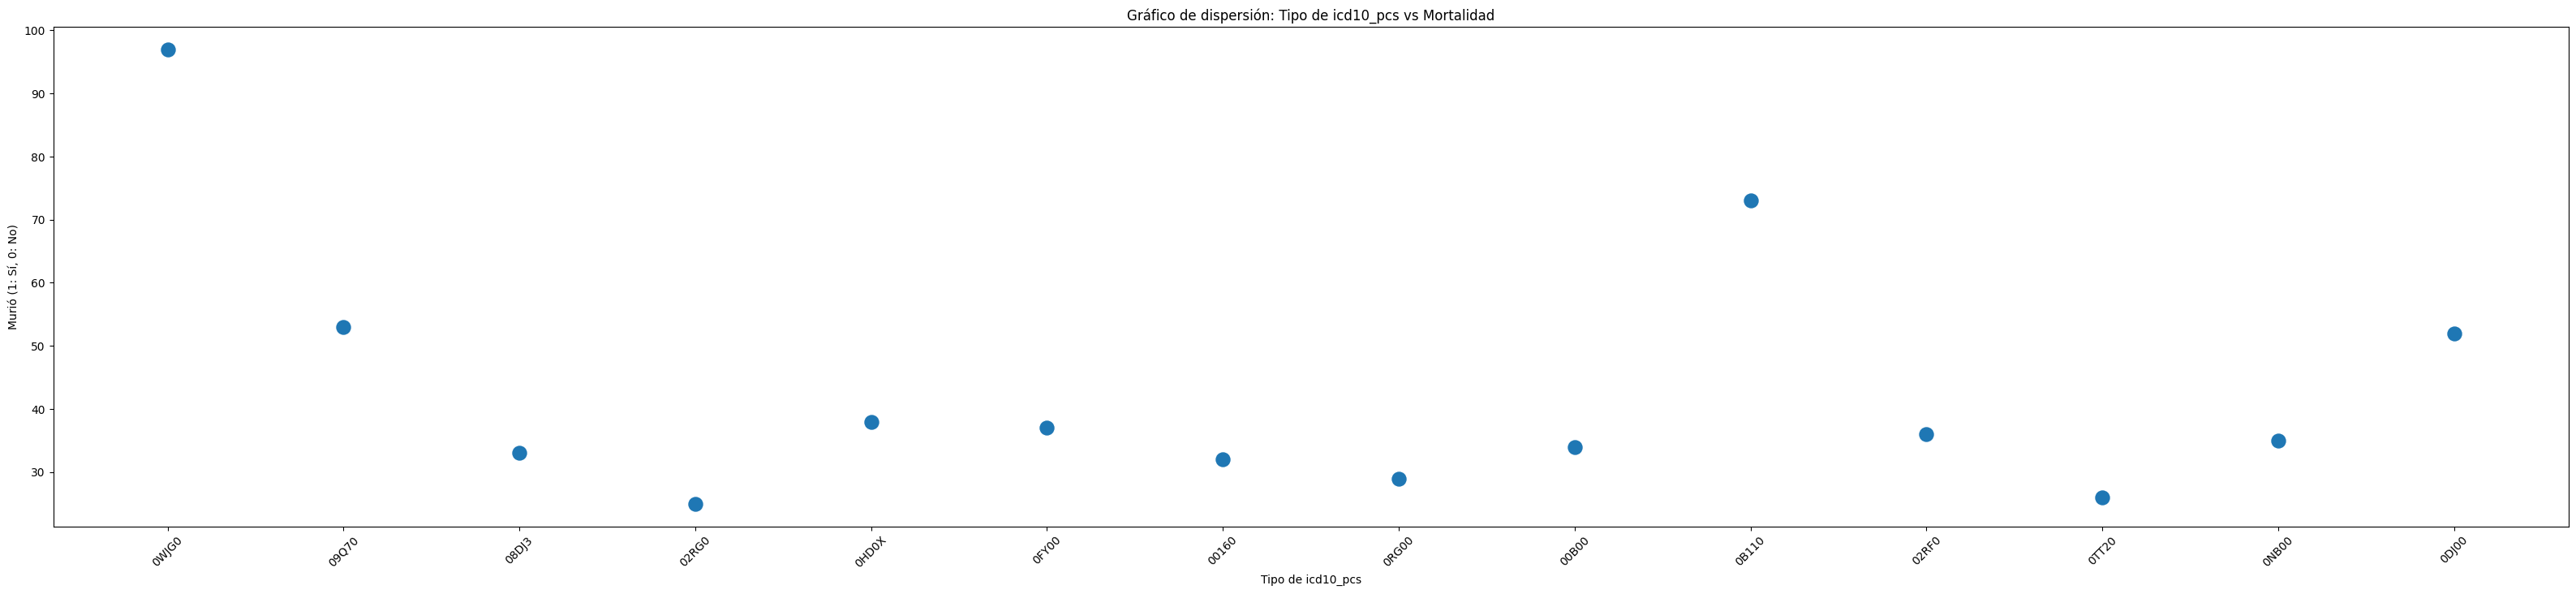

In [ ]:
# Suponiendo que tienes un DataFrame llamado df con las columnas 'tiempo_UCI' y 'murió'

mortality_df_filtered = mortality_df.query('Mortality_Count > 20')

plt.figure(figsize=(40, 8))
plt.scatter(mortality_df_filtered['icd10_pcs'], mortality_df_filtered['Mortality_Count'],s=150)
plt.xlabel('Tipo de icd10_pcs')
plt.xticks(rotation=45)
plt.ylabel('Murió (1: Sí, 0: No)')
plt.title('Gráfico de dispersión: Tipo de icd10_pcs vs Mortalidad')
plt.show()



In [ ]:
#Utilizo el codigo icd10_pcs de los pacientes que tienen mayor numero de fallecidos

paciente_pro=ope_data[ope_data['icd10_pcs'] =='0WJG0']
pacientes_UCI_id=paciente_pro['subject_id']

indices_final=pacientes_UCI_id.unique()
np.size(indices_final)

1235

In [ ]:
paciente_pro

,op_id,subject_id,hadm_id,case_id,opdate,age,sex,weight,height,race,...,opend_time,admission_time,discharge_time,anstart_time,anend_time,cpbon_time,cpboff_time,icuin_time,icuout_time,inhosp_death_time
1,446270725,158995752,257857903,NaN,0,70,M,43.0,168.0,Asian,...,1540.0,0,70555,1345.0,1540.0,NaN,NaN,1550.0,19595.0,69860.0
35,452566478,158995752,257857903,NaN,2880,70,M,43.0,174.0,Asian,...,4015.0,0,70555,3830.0,4020.0,NaN,NaN,1550.0,19595.0,69860.0
52,440391574,192250700,291434429,NaN,1440,65,F,59.0,163.0,Asian,...,2740.0,0,31675,2355.0,2735.0,NaN,NaN,2750.0,5095.0,NaN
123,411634952,121041674,275074982,NaN,2880,60,F,43.0,157.0,Asian,...,3460.0,0,11515,3365.0,3465.0,NaN,NaN,NaN,NaN,NaN
143,442167773,144893612,280737012,NaN,0,40,M,63.0,174.0,Asian,...,450.0,0,12955,270.0,445.0,NaN,NaN,460.0,2390.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110945,487618002,186132074,263817440,-25472.0,1440,80,F,49.0,146.0,Asian,...,2330.0,0,14395,2170.0,2355.0,NaN,NaN,NaN,NaN,NaN
112059,416006595,192891843,216410186,-22950.0,1440,50,F,64.0,158.0,Asian,...,2375.0,0,10075,2265.0,2380.0,NaN,NaN,NaN,NaN,NaN
112280,428282025,173675824,270574460,-23122.0,1440,25,F,75.0,160.0,Asian,...,2145.0,0,8635,2030.0,2145.0,NaN,NaN,NaN,NaN,NaN
114063,496198262,178121234,243505343,-18019.0,2350080,70,M,60.0,158.0,Asian,...,2350960.0,2347200,2358715,2350710.0,2350965.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import files
# Guardar DataFrame como CSV en Colab
indices_final.to_csv('datos4.csv', index=False)

# Descargar el archivo CSV
files.download('datos4.csv')